## Dans cet étude la, on va fair des statistiques sur une dataset des livres


### Lecture des données


In [1]:
livres <- read.csv("data/Books_Data_Clean.csv",
  header = TRUE,
  stringsAsFactors = TRUE,
  na.strings = c("")
)

head(livres)


,index,Publishing.Year,Book.Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross.sales,publisher.revenue,sale.price,sales.rank,Publisher,units.sold
,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<int>
1,0,1975,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
2,1,1987,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lewis, Dennis O'Neil",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
3,2,2015,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
4,3,2008,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
5,4,2011,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750
6,5,2015,Red Queen,Victoria Aveyard,eng,Intermediate,4.08,83354,genre fiction,19960.0,0.0,4.99,5,"Amazon Digital Services, Inc.",4000


In [2]:
# On supprime les lignes avec des valeurs NA
library(tidyr)
livres <- drop_na(livres)


In [3]:
# on voir des informations sur notre données
summary(livres)


     index        Publishing.Year                                Book.Name  
 Min.   :   0.0   Min.   :-560    Persepolis                          :  2  
 1st Qu.: 263.2   1st Qu.:1985    The Awakening                       :  2  
 Median : 530.5   Median :2003     A Monster Calls                    :  1  
 Mean   : 529.6   Mean   :1971     Animal Farm & 1984                 :  1  
 3rd Qu.: 793.8   3rd Qu.:2010     The Tale of Despereaux             :  1  
 Max.   :1069.0   Max.   :2016    'Salem's Lot The Illustrated Edition:  1  
                                  (Other)                             :990  
              Author    language_code      Author_Rating Book_average_rating
 Stephen King    : 27   eng    :725   Excellent   :333   Min.   :2.970      
 Charlaine Harris: 10   en-US  :228   Famous      : 47   1st Qu.:3.850      
 Jim Butcher     : 10   en-GB  : 29   Intermediate:589   Median :4.010      
 Nicholas Sparks : 10   en-CA  :  7   Novice      : 29   Mean   :4.003      

In [4]:
# pour la visualisation des donnees on va utiliser ggplot2
# library(dplyr)
# library(ggplot2)
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Warning message in geom_histogram(stat = "count", show.legend = FALSE):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


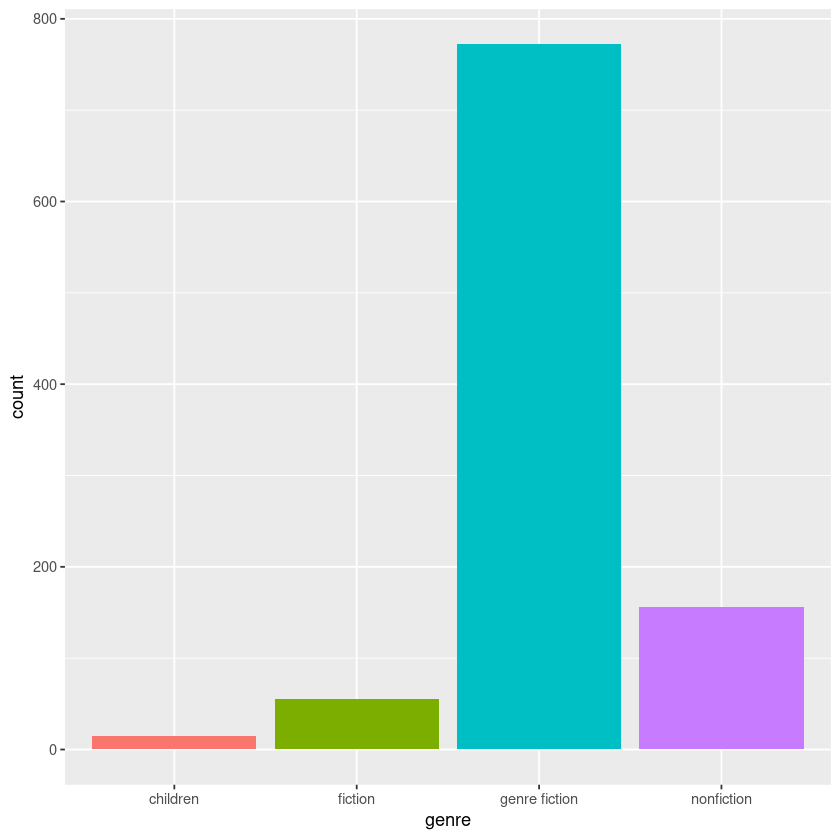

In [5]:
# on commence par la representation des fréquence de chaque genre des livres
ggplot(livres, aes(x = genre, fill = genre)) +
  geom_histogram(stat = "count", show.legend = FALSE)


In [6]:
# Maintenant on va voir les top auteurs avec les plus grands rating de livre
top10auteurs <- livres %>% slice_max(order_by = livres$Book_average_rating, n = 10)
head(top10auteurs)


,index,Publishing.Year,Book.Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross.sales,publisher.revenue,sale.price,sales.rank,Publisher,units.sold
,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<int>
1,331,2014,Words of Radiance,Brandon Sanderson,eng,Famous,4.77,73572,genre fiction,741.52,444.912,2.99,354,HarperCollins Publishers,248
2,777,2016,A Court of Mist and Fury,Sarah J. Maas,eng,Famous,4.72,108384,genre fiction,1158.84,695.304,9.99,900,Simon and Schuster Digital Sales Inc,28512
3,479,1988,The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury,Bill Watterson,en-US,Famous,4.65,93001,genre fiction,166.32,0.000,0.99,530,"Amazon Digital Services, Inc.",4536
4,31,2010,The Way of Kings,Brandon Sanderson,eng,Famous,4.64,144822,genre fiction,2178.00,0.000,0.99,32,"Amazon Digital Services, Inc.",2200
5,249,1987,Calvin and Hobbes,"Bill Watterson, G.B. Trudeau",en-US,Famous,4.61,117788,nonfiction,1886.22,1131.732,4.99,273,Penguin Group (USA) LLC,378
6,733,2015,Queen of Shadows,Sarah J. Maas,eng,Famous,4.60,99067,genre fiction,349.83,209.898,2.99,841,Macmillan,33048


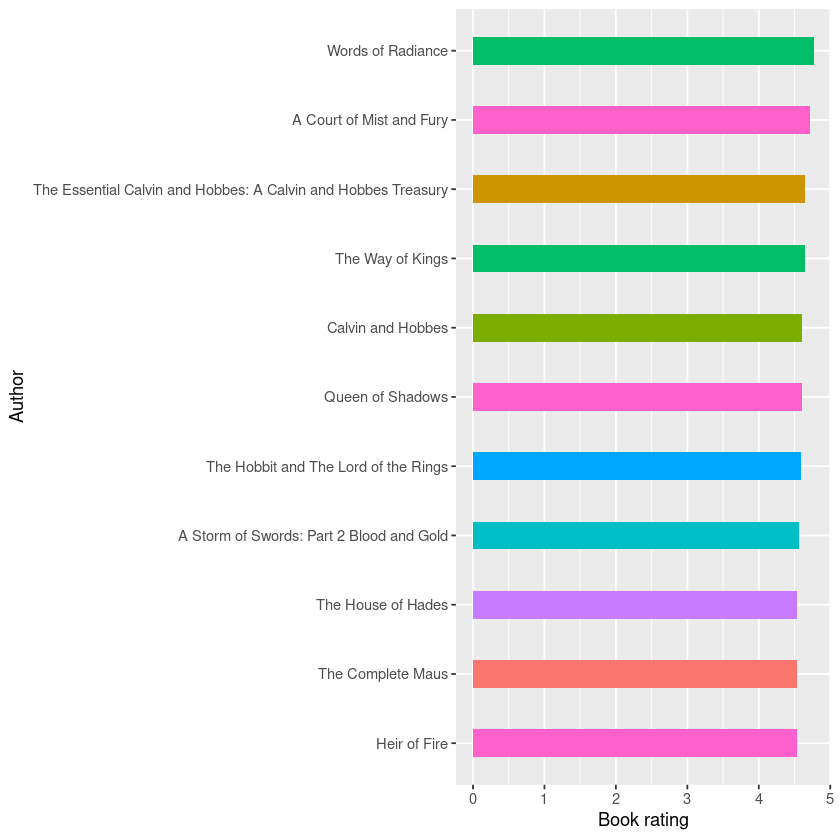

In [7]:
ggplot(top10auteurs, aes(
  x = Book_average_rating,
  y = fct_reorder(Book.Name, Book_average_rating),
  fill = Author
)) +
  geom_col(show.legend = FALSE, width = 0.4) +
  # geom_text(label = top10auteurs$Book_average_rating) +
  xlab("Book rating") +
  ylab("Author")


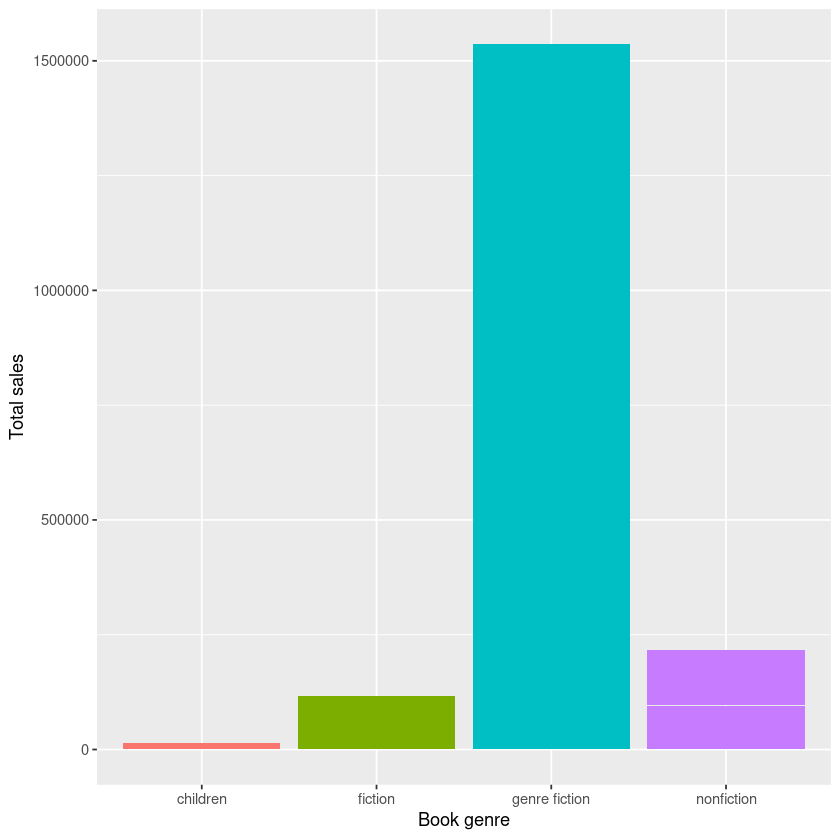

In [8]:
# Maintenant on va voir le total de revenues par genre
ggplot(livres, aes(x = genre, y = gross.sales, fill = genre)) +
  geom_col(show.legend = FALSE) +
  xlab("Book genre") +
  ylab("Total sales")


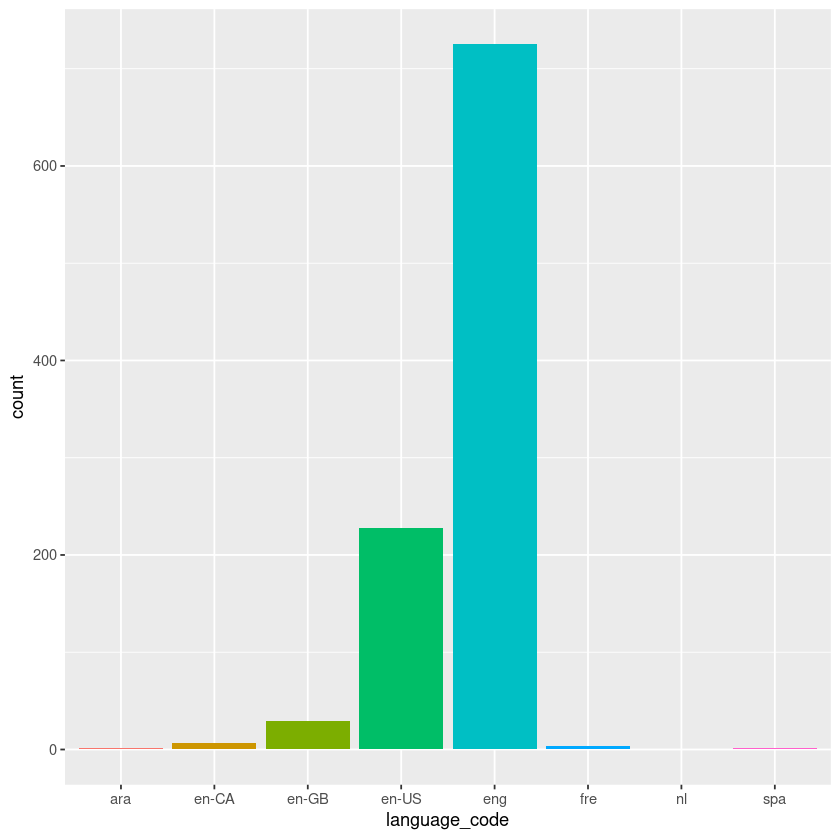

In [9]:
# On voir les langues les plus frequent
ggplot(livres, aes(x = language_code, fill = language_code)) +
  geom_bar(show.legend = FALSE)


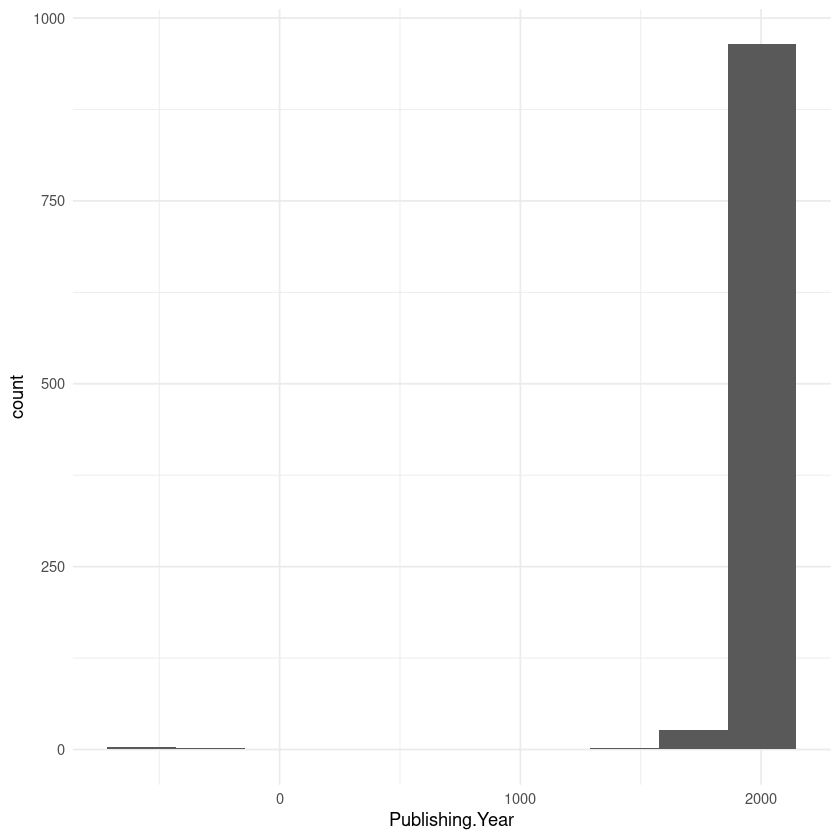

In [10]:
ggplot(livres, aes(x = Publishing.Year)) +
  geom_histogram(bins = 10) +
  theme_minimal()


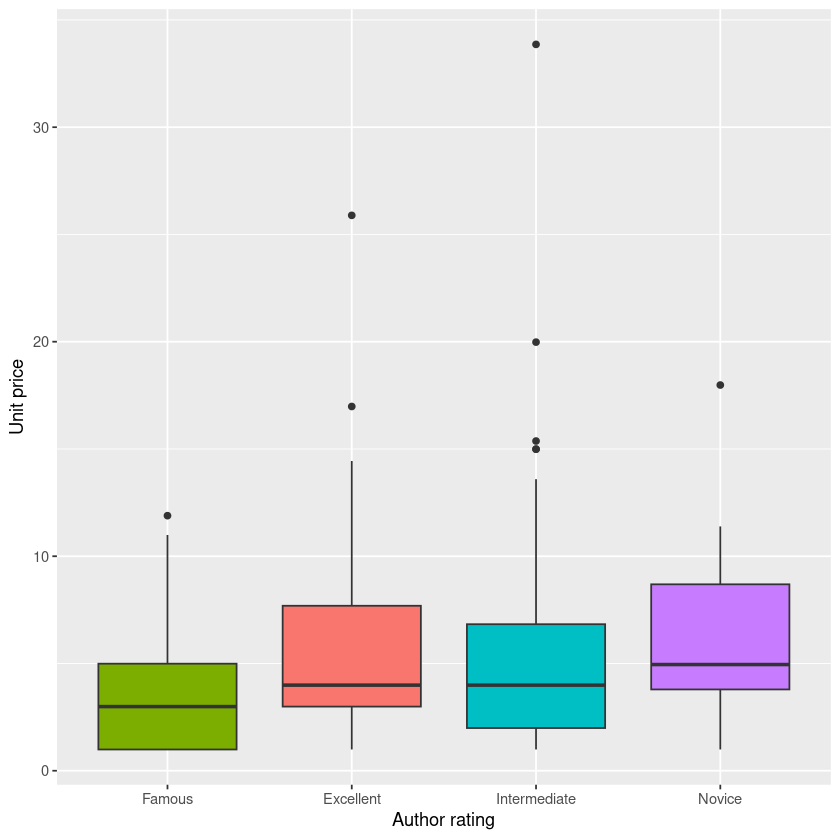

In [54]:
# On va voir maintenant la relation entre la célébrité d'auteur et le prix de livre
ggplot(livres, aes(
  x = fct_reorder(Author_Rating, sale.price),
  y = sale.price,
  fill = Author_Rating
)) +
  geom_boxplot(show.legend = FALSE) +
  xlab("Author rating") +
  ylab("Unit price")
